In [2]:
!pip install geopy==2.4.1
!pip install geodatasets==2023.12.0
from geopy.geocoders import Nominatim
import geopandas as gpd
import pandas as pd
import geodatasets
import matplotlib.pyplot as plt
from shapely.geometry import Point
import json

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.4/125.4 kB 20.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 kB 12.6 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.0/63.0 kB 17.8 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [3]:
# calling the Nominatim tool and create Nominatim class
loc = Nominatim(user_agent="Geopy Library")

def getLongAlt(address):
    getLoc = loc.geocode(address)
    return getLoc.latitude, getLoc.longitude


<AxesSubplot: >

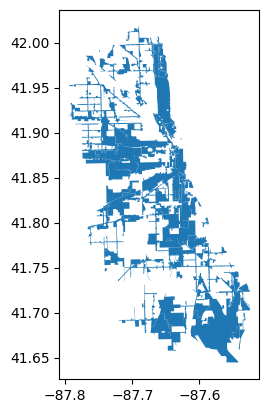

In [ ]:
# This cell from Alattin Kirtisoglu
tif = gpd.read_file('/work/chiTifBoundaries.shp')
# Set the coordinate reference system to the standard latitude/longitude system
tif = tif.set_crs(epsg=4326)

tif.plot()
# tif.shape
# len(tif)

<AxesSubplot: >

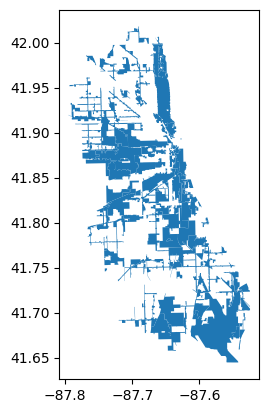

In [4]:
tif_geo = gpd.read_file('Boundaries TIF.geojson')
# Set the coordinate reference system to the standard latitude/longitude system
tif_geo = tif_geo.set_crs(epsg=4326)

tif_geo.plot()
# tif.shape
# len(tif)

<AxesSubplot: >

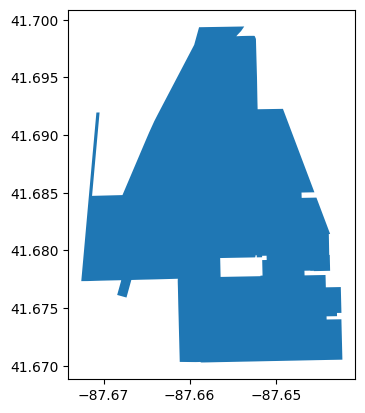

In [ ]:
tif.iloc[[114]].plot()

In [ ]:
tif_geo.iloc[[115]]
# tif_geo.iloc[[115]].plot()

,sbif,name,shape_area,show,objectid_1,name_trim,wards_2023,ref,approval_d,objectid,...,shape_leng,comm_area,objectid_2,use,repealed_d,type,shape_le_1,ind,expiration,geometry
115,Y,119th Street/I-57,52679426.8904,0,119,119th Street/I-57,"19,21",T-125,11/6/2002,5235,...,48809.1889126,"53,75",119,Mixed-use: Commercial/Residential/Institutional,None,Existing,48809.1889126,Mixed-use,12/31/2026,"MULTIPOLYGON (((-87.65446 41.69868, -87.65458 ..."


In [ ]:
def isInsideTIF(point):
    # takes a Point class and returns the index of the TIF that contains the Point
    # NOTE: RETURNS AN ARRAY NOT BOOL
    returnArray = []
    # iterate over all the distrcits and see if it contains the given point
    for index, row in tif.iterrows():
        if row['geometry'].contains(point):
            returnArray.append(index)
    
    return returnArray

In [ ]:
def isInsideTIF_Geo(point):# Point(long, lat)
    # takes a Point class and returns the index of the TIF that contains the Point
    # NOTE: RETURNS AN ARRAY NOT BOOL
    returnArray = []
    # iterate over all the distrcits and see if it contains the given point
    for index, row in tif_geo.iterrows():
        if row['geometry'].contains(point):
            # returnArray.append(index)
            returnArray.append(row['name'])
    
    return returnArray

# long, lat
print(isInsideTIF_Geo(Point(-87.65454023,41.68421355)))


['119th Street/I-57']


In [5]:
tif_geo

,sbif,name,shape_area,show,objectid_1,name_trim,wards_2023,ref,approval_d,objectid,...,shape_leng,comm_area,objectid_2,use,repealed_d,type,shape_le_1,ind,expiration,geometry
0,N,116th/Avenue O,11512032.0441,1,1,116th/Avenue O,10,T-182,10/31/2018,5167,...,22113.6634385,"51,52,55",100,Mixed-use: Comm/Indust/Institut/Parks/Open Space,None,Existing,22113.6634385,Mixed-use,12/31/2042,"MULTIPOLYGON (((-87.53995 41.68459, -87.53995 ..."
1,Y,Bryn Mawr/Broadway,1497351.76204,1,2,Bryn Mawr/Broadway,48,T- 13,11/4/1998,5207,...,10146.7645744,77,38,Mixed-use: Residential/Commercial,None,Existing,10146.7645744,Mixed-use,12/31/2032,"MULTIPOLYGON (((-87.66051 41.98451, -87.66037 ..."
2,N,51st and Lake Park,99810.7553475,1,3,51st and Lake Park,4,T-175,11/15/2012,5185,...,1319.69144432,41,19,Mixed-use: Residential/Commercial/Retail,None,Existing,1319.69144432,Mixed-use,12/31/2036,"MULTIPOLYGON (((-87.58854 41.80155, -87.58902 ..."
3,N,Lakefront,1234864.43789,2,4,Lakefront,4,T-119,3/27/2002,5150,...,7017.57899731,36,34,Residential,None,Existing,7017.57899731,Residential,12/31/2026,"MULTIPOLYGON (((-87.59624 41.81693, -87.59676 ..."
4,N,Madden/Wells,5460412.60763,2,5,Madden/Wells,4,T-126,11/6/2002,0,...,12134.5933039,"35,36,38",129,Residential,None,Existing,12134.5933039,Residential,12/31/2038,"MULTIPOLYGON (((-87.61454 41.82808, -87.61455 ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,Y,Lincoln Avenue,7596571.99264,1,120,Lincoln Avenue,"40,50",T- 77,11/3/1999,5242,...,31074.4029002,"2,4,13",120,Mixed-use: Residential/Commercial/Institutional,None,Existing,31074.4029002,Mixed-use,12/31/2035,"MULTIPOLYGON (((-87.71047 41.99673, -87.71047 ..."
117,Y,63rd/Pulaski,9238352.82417,1,121,63rd/Pulaski,"13,23",T- 98,5/17/2000,5243,...,56569.2043874,"57,62,64,65",121,Mixed-use: See Plan for Details,None,Existing,56569.2043874,Mixed-use,12/31/2024,"MULTIPOLYGON (((-87.72180 41.76583, -87.72186 ..."
118,N,Cortland and Chicago River,7631475.18575,0,122,Cortland and Chicago River,"2,32",T-183,4/10/2019,5246,...,17249.9092933,"7,8,22,24",122,Mixed-use: Res/Comm/Instit/Parks/Open Space,None,Existing,17249.9092933,Mixed-use,12/31/2043,"MULTIPOLYGON (((-87.66612 41.92000, -87.66603 ..."
119,N,Canal/Congress,3048664.30904,1,123,Canal/Congress,"28,34,42",T- 63,11/12/1998,5249,...,15935.144818,28,123,Mixed-use: Residential/Commercial/Institutional,None,Existing,15935.144818,Mixed-use,12/31/2034,"MULTIPOLYGON (((-87.64485 41.88255, -87.64474 ..."


In [10]:
tif_no_geo = df.iloc[:, :-1]

,sbif,name,shape_area,show,objectid_1,name_trim,wards_2023,ref,approval_d,objectid,fid_1,shape_leng,comm_area,objectid_2,use,repealed_d,type,shape_le_1,ind,expiration
0,N,116th/Avenue O,11512032.0441,1,1,116th/Avenue O,10,T-182,10/31/2018,5167,100,22113.6634385,"51,52,55",100,Mixed-use: Comm/Indust/Institut/Parks/Open Space,None,Existing,22113.6634385,Mixed-use,12/31/2042
1,Y,Bryn Mawr/Broadway,1497351.76204,1,2,Bryn Mawr/Broadway,48,T- 13,11/4/1998,5207,38,10146.7645744,77,38,Mixed-use: Residential/Commercial,None,Existing,10146.7645744,Mixed-use,12/31/2032
2,N,51st and Lake Park,99810.7553475,1,3,51st and Lake Park,4,T-175,11/15/2012,5185,18,1319.69144432,41,19,Mixed-use: Residential/Commercial/Retail,None,Existing,1319.69144432,Mixed-use,12/31/2036
3,N,Lakefront,1234864.43789,2,4,Lakefront,4,T-119,3/27/2002,5150,34,7017.57899731,36,34,Residential,None,Existing,7017.57899731,Residential,12/31/2026
4,N,Madden/Wells,5460412.60763,2,5,Madden/Wells,4,T-126,11/6/2002,0,85,12134.5933039,"35,36,38",129,Residential,None,Existing,12134.5933039,Residential,12/31/2038
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,Y,Lincoln Avenue,7596571.99264,1,120,Lincoln Avenue,"40,50",T- 77,11/3/1999,5242,119,31074.4029002,"2,4,13",120,Mixed-use: Residential/Commercial/Institutional,None,Existing,31074.4029002,Mixed-use,12/31/2035
117,Y,63rd/Pulaski,9238352.82417,1,121,63rd/Pulaski,"13,23",T- 98,5/17/2000,5243,120,56569.2043874,"57,62,64,65",121,Mixed-use: See Plan for Details,None,Existing,56569.2043874,Mixed-use,12/31/2024
118,N,Cortland and Chicago River,7631475.18575,0,122,Cortland and Chicago River,"2,32",T-183,4/10/2019,5246,121,17249.9092933,"7,8,22,24",122,Mixed-use: Res/Comm/Instit/Parks/Open Space,None,Existing,17249.9092933,Mixed-use,12/31/2043
119,N,Canal/Congress,3048664.30904,1,123,Canal/Congress,"28,34,42",T- 63,11/12/1998,5249,122,15935.144818,28,123,Mixed-use: Residential/Commercial/Institutional,None,Existing,15935.144818,Mixed-use,12/31/2034


In [11]:
tif_no_geo.to_csv("Boundaries TIF no geo.csv")

In [15]:
df_2 = _deepnote_execute_sql('SELECT MIN(approval_d) AS min_date, MAX(approval_d) AS max_date,MIN(expiration) AS min_date_exp, MAX(expiration) AS max_date_exp\nFROM \'Boundaries TIF no geo.csv\';\n', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled')
df_2

,min_date,max_date,min_date_exp,max_date_exp
0,1989-09-13,2022-12-14,2024-12-31,2058-12-31


In [13]:
df_3 = _deepnote_execute_sql('SELECT MAX(approval_d) AS min_date\nFROM \'Boundaries TIF no geo.csv\';\n', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled')
df_3

,min_date
0,2022-12-14


----------------------------------------------------------------Mapping shapes to names---------------------------------------------------------

In [ ]:
df_1 = _deepnote_execute_sql('-- SELECT id, MIN(long) as long, MIN(lat) as lat\nSELECT id, long, lat\nFROM \'TIF_2021_shapefile.csv\'\n-- where id = \'105th Street and Vincennes Avenue\'\n-- GROUP BY id;', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled')
df_1

,id,long,lat
0,105th Street and Vincennes Avenue,-87.651471,41.717617
1,105th Street and Vincennes Avenue,-87.651429,41.717614
2,105th Street and Vincennes Avenue,-87.650856,41.717621
3,105th Street and Vincennes Avenue,-87.650701,41.717623
4,105th Street and Vincennes Avenue,-87.650551,41.717625
...,...,...,...
96925,Woodlawn,-87.590389,41.784624
96926,Woodlawn,-87.590383,41.784628
96927,Woodlawn,-87.590307,41.784586
96928,Woodlawn,-87.590233,41.784543


<AxesSubplot: >

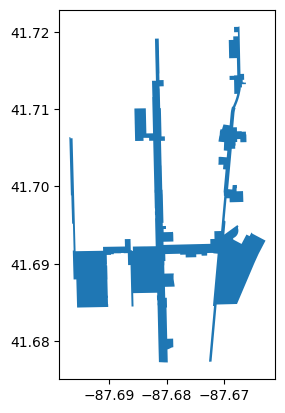

In [ ]:
len(tif)
tif.iloc[[1]].plot()

In [ ]:
print(isInsideTIF(Point(-87.65454023,41.68421355)))


[114]


In [ ]:
vals_dict = {}
# i = 0
for index, row in df_1.iterrows():
    lst = isInsideTIF(Point(row['long'],row['lat']))
    for i in range(len(lst)):
        if row['id'] not in vals_dict.keys():
            vals_dict[row['id']] = {lst[i]:1,}
        else:
            if lst[i] not in vals_dict[row['id']].keys():
                vals_dict[row['id']][lst[i]] = 1
            else:
                vals_dict[row['id']][lst[i]] += 1

    # if i == 5000:
    #     break
    # i+=1
print(vals_dict)

file_path = 'my_dict.json'

# Serialize the dictionary to a JSON-formatted string
json_string = json.dumps(vals_dict, indent=2)

# Write the JSON string to a file
with open(file_path, 'w') as file:
    file.write(json_string)

{'105th Street and Vincennes Avenue': {17: 93, 120: 3, 61: 8, 114: 2}, '107th/Halsted': {114: 33, 61: 133, 17: 25, 120: 39, 42: 22}, '111th Street/Kedzie Avenue Business District': {76: 199, 1: 3}, '116th/Avenue O': {46: 432, 3: 15, 4: 323}, '119th and Halsted': {42: 210, 61: 23, 120: 7, 114: 85}, '119th Street/I-57': {114: 377, 61: 22, 42: 81, 1: 95, 17: 1}, '24th/Michigan': {127: 175, 68: 50, 130: 44, 13: 16, 126: 10}, '26th & King Drive': {10: 64, 13: 20, 130: 32}, '35th & Wallace': {84: 196, 130: 203, 91: 10}, '35th/Halsted': {91: 562, 84: 1, 119: 18}, '35th/State': {5: 131, 130: 35, 13: 86, 84: 2}, '43rd Street/Cottage Grove Avenue': {100: 28, 2: 186, 108: 49}, '47th and King Drive': {108: 234, 13: 40, 2: 66, 104: 3, 23: 34, 58: 1}, '47th/Ashland': {117: 660, 8: 3, 58: 9, 22: 4}, '47th/Halsted': {58: 784, 108: 1, 23: 17, 104: 1, 98: 22, 117: 16, 8: 32, 13: 2}, '47th/State': {23: 127, 108: 54, 104: 59, 58: 12}, '51st and Lake Park': {64: 15, 109: 9}, '51st/Archer': {90: 671, 122: 2

In [ ]:
# now need to pick max from each and make the csv to save
# Read the dictionary back from the file
file_path = 'my_dict.json'
with open(file_path, 'r') as file:
    vals_dict = json.load(file)

print("Loaded dictionary:", vals_dict)

reverse_dict = {}

for tif_name in vals_dict.keys():
    nums_dict = vals_dict[tif_name]
    # for num in nums_dict.keys():
    max_key = max(nums_dict, key=lambda k: nums_dict[k])
    vals_dict[tif_name] = int(max_key)
    reverse_dict[int(max_key)] = tif_name
    
    print(tif_name,":",int(max_key))

print(vals_dict)
print(reverse_dict)

# write the reverse_dict
file_path = 'tif_num_names.json'

json_string = json.dumps(reverse_dict, indent=2)

with open(file_path, 'w') as file:
    file.write(json_string)

# write the vals_dict
file_path = 'tif_names_num.json'

json_string = json.dumps(vals_dict, indent=2)

with open(file_path, 'w') as file:
    file.write(json_string)

Loaded dictionary: {'105th Street and Vincennes Avenue': {'17': 93, '120': 3, '61': 8, '114': 2}, '107th/Halsted': {'114': 33, '61': 133, '17': 25, '120': 39, '42': 22}, '111th Street/Kedzie Avenue Business District': {'76': 199, '1': 3}, '116th/Avenue O': {'46': 432, '3': 15, '4': 323}, '119th and Halsted': {'42': 210, '61': 23, '120': 7, '114': 85}, '119th Street/I-57': {'114': 377, '61': 22, '42': 81, '1': 95, '17': 1}, '24th/Michigan': {'127': 175, '68': 50, '130': 44, '13': 16, '126': 10}, '26th & King Drive': {'10': 64, '13': 20, '130': 32}, '35th & Wallace': {'84': 196, '130': 203, '91': 10}, '35th/Halsted': {'91': 562, '84': 1, '119': 18}, '35th/State': {'5': 131, '130': 35, '13': 86, '84': 2}, '43rd Street/Cottage Grove Avenue': {'100': 28, '2': 186, '108': 49}, '47th and King Drive': {'108': 234, '13': 40, '2': 66, '104': 3, '23': 34, '58': 1}, '47th/Ashland': {'117': 660, '8': 3, '58': 9, '22': 4}, '47th/Halsted': {'58': 784, '108': 1, '23': 17, '104': 1, '98': 22, '117': 16

-----------------------------------------------------------End mapping code----------------------------------------------------------------------

In [ ]:
tif_geo.iloc[0]

/shared-libs/python3.9/py/lib/python3.9/site-packages/pandas/core/dtypes/inference.py:397: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  iter(obj)  # Can iterate over it.
/shared-libs/python3.9/py/lib/python3.9/site-packages/pandas/core/dtypes/inference.py:398: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  len(obj)  # Has a length associated with it.
/shared-libs/python3.9/py/lib/python3.9/site-packages/pandas/io/formats/printing.py:115: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  s = iter(seq)
/shared-libs/python3.9

sbif                                                          N
name                                             116th/Avenue O
shape_area                                        11512032.0441
show                                                          1
objectid_1                                                    1
name_trim                                        116th/Avenue O
wards_2023                                                   10
ref                                                       T-182
approval_d                                           10/31/2018
objectid                                                   5167
fid_1                                                       100
shape_leng                                        22113.6634385
comm_area                                              51,52,55
objectid_2                                                  100
use            Mixed-use: Comm/Indust/Institut/Parks/Open Space
repealed_d                              

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=41bd1eeb-8ade-41a5-ae81-cf4a88f38197' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>